<a href="https://colab.research.google.com/github/microprediction/winning/blob/main/triangle_man_extended.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install winning

## A map from the simplex to cube
This notebook investigates the use of the so-called ability transform to create bijections from the simplex to the cube. These maps are computationally tractible up to 100,000 dimensions. Here we try to visualize a very low dimensioncal map. 

In [4]:
from winning.std_calibration import std_ability_implied_state_prices, std_state_price_implied_ability
from scipy.stats import norm
from typing import List

    
def cube_to_simplex(u:List[float]) -> List[float]: 
    """
       :param  u is a point on the interior of the hyper-cube (0,1)^n 
       :returns  a point p in (0,1)^{n+1} with sum(p)=1 
     
    """
    a = [0] + [ -norm.ppf(ui) for ui in u ]
    p = std_ability_implied_state_prices(a)
    return p 


def simplex_to_cube(p:List[float]):
    """ The inverse map 
    
         :param    p in [0,1]^{n+1}  with entries summing to unity 
         :returns  (0,1)^n 
    
    """
    x_mean_zero = std_state_price_implied_ability(p)
    offset = x_mean_zero[0]
    a =  [ xi-offset for xi in x_mean_zero ]
    return [ norm.cdf(ai) for ai in a[1:] ]
    

## Examples

In [ ]:
simplex_to_cube([0.25,0.25,0.25,0.25])

[0.5, 0.5, 0.5]

In [ ]:
simplex_to_cube([0.35,0.25,0.25,0.15])

[0.6002788374851822, 0.6002788374851822, 0.7288015507586241]

### Corners

In [ ]:
simplex_to_cube([0.98,0.01,0.01]),simplex_to_cube([0.01,0.98,0.01]),simplex_to_cube([0.01,0.01,0.98])

([0.9994399113937293, 0.9994399113937293],
 [0.000560088606270627, 0.5],
 [0.5, 0.0005600886062706243])

In [ ]:
cube_to_simplex([0.0001,0.0001]),cube_to_simplex([0.9999,0.0001]),cube_to_simplex([0.9999,0.9999]),cube_to_simplex([0.9999,0.0001])

([0.991796977822986, 0.004097490983014038, 0.004097490983014038],
 [0.0042985798038551815, 0.9830667839032847, 4.026707310234546e-08],
 [0.00040156074649629997, 0.5001746590742873, 0.5001746590742873],
 [0.0042985798038551815, 0.9830667839032847, 4.026707310234546e-08])

### Traveling around the triangle
We create concentric triangles in the simplex and plot the images on the cube. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def combos(x,y):
    lmbds = np.linspace(0,1,100)
    return np.array([ (1-lmbd)*x+lmbd*y for lmbd in lmbds])


def make_sides(eps):
    corner1 = np.array([1,0,0])
    corner2 = np.array([0,1,0])
    corner3 = np.array([0,0,1])
    middle = np.array([1/3.,1/3.,1/3.])
    corner1eps = eps*middle + (1 - eps)*corner1
    corner2eps = eps*middle + (1 - eps)*corner2
    corner3eps = eps*middle + (1 - eps)*corner3
    side12 = combos(corner1eps,corner2eps)
    side23 = combos(corner2eps, corner3eps)
    side31 = combos(corner3eps, corner1eps)
    return [side12,side23,side31]


def plot_on_cube(ts, ls, c):
    x = [t[0] for t in ts]
    y = [t[1] for t in ts]
    plt.plot(x, y, ls + c)


def plot_image(eps, ls):
    sides = make_sides(eps)
    for side, c in zip(sides, ['r', 'g', 'b']):
        ts = [simplex_to_cube(s) for s in side]
        plot_on_cube(ts=ts, ls=ls, c=c)


def plot_concentric_on_cube():
    for eps, ls in zip([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], ['-']*100):
        plot_image(eps, ls)




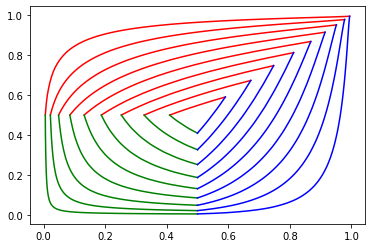

In [ ]:
plot_concentric_on_cube()

# Visualize the surjection

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl

# Set the default plot size to be larger
mpl.rcParams['figure.figsize'] = [12, 6]

def plot_bijection(f):
    # Define the vertices of the simplex
    vertices = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])

    # Define the colors of the vertices
    colors = ['r', 'g', 'b']

    # Create a 3D plot of the simplex on the left
    fig = plt.figure()
    ax1 = fig.add_subplot(121, projection='3d')

    # Plot the simplex vertices
    ax1.scatter(vertices[:, 0], vertices[:, 1], vertices[:, 2], c=colors, s=50)

    # Plot the simplex interior
    N = 20
    x = np.linspace(0, 1, N+1)
    y = np.linspace(0, 1, N+1)
    X, Y = np.meshgrid(x, y)
    Z = 1 - X - Y
    mask = (Z >= 0)
    X = X[mask]
    Y = Y[mask]
    Z = Z[mask]
    ax1.scatter(X, Y, Z, c='k', s=5)

    # Plot the simplex edges
    ax1.plot(vertices[[0,1], 0], vertices[[0,1], 1], vertices[[0,1], 2], 'k-', lw=1)
    ax1.plot(vertices[[1,2], 0], vertices[[1,2], 1], vertices[[1,2], 2], 'k-', lw=1)
    ax1.plot(vertices[[2,0], 0], vertices[[2,0], 1], vertices[[2,0], 2], 'k-', lw=1)

    # Set the limits and labels of the plot
    ax1.set_xlim(0, 1)
    ax1.set_ylim(0, 1)
    ax1.set_zlim(0, 1)
    ax1.view_init(elev=60, azim=-25)
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax1.set_zlabel('z')

    # Create a plot of the square on the right
    ax2 = fig.add_subplot(122)

    # Plot the square
    square = np.array([[0, 0], [0, 1], [1, 1], [1, 0], [0, 0]])
    ax2.plot(square[:, 0], square[:, 1], 'k-', lw=1)

    # Define the mesh of points in the 2-simplex
    x = np.linspace(0, 1, N+1)
    y = np.linspace(0, 1, N+1)
    X, Y = np.meshgrid(x, y)
    Z = 1 - X - Y
    mask = (Z >= 0)
    X = X[mask]
    Y = Y[mask]
    Z = Z[mask]
    mesh_points = np.column_stack((X, Y, Z))

    # Plot the images of the mesh points in the 2-cube
    for p in mesh_points:
        w = f(p)
        ax2.plot(w[0], w[1], 'k.', markersize=2)

    # Set the limits and labels of the plot
    ax2.set_xlim(0, 1)
    ax2.set_ylim(0, 1)
    ax2.set_xlabel('x')
    ax2.set_ylabel('y')

    plt.show()


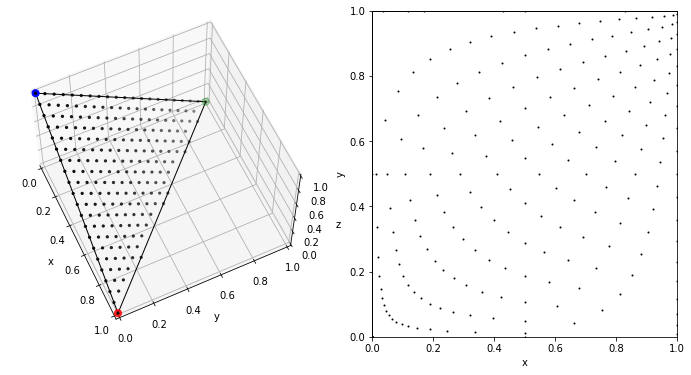

In [ ]:
plot_bijection(simplex_to_cube)

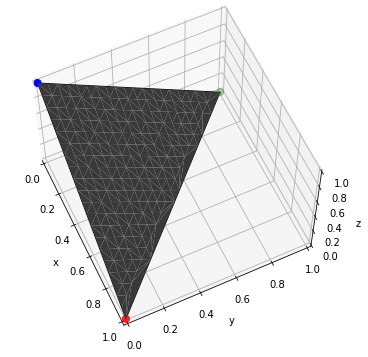

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl

# Set the default plot size to be larger
mpl.rcParams['figure.figsize'] = [12, 6]

def plot_simplex():
    # Define the vertices of the simplex
    vertices = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])

    # Define the colors of the vertices
    colors = ['r', 'g', 'b']

    # Create a 3D plot of the simplex on the left
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot the simplex vertices
    ax.scatter(vertices[:, 0], vertices[:, 1], vertices[:, 2], c=colors, s=50)

    # Plot the simplex interior
    N = 20
    x = np.linspace(0, 1, N+1)
    y = np.linspace(0, 1, N+1)
    X, Y = np.meshgrid(x, y)
    Z = 1 - X - Y
    mask = (Z >= 0)
    X = X[mask]
    Y = Y[mask]
    Z = Z[mask]
    ax.plot_trisurf(X, Y, Z, linewidth=0.2, antialiased=True, color='gray')

    # Plot the simplex edges
    ax.plot(vertices[[0,1], 0], vertices[[0,1], 1], vertices[[0,1], 2], 'k-', lw=1)
    ax.plot(vertices[[1,2], 0], vertices[[1,2], 1], vertices[[1,2], 2], 'k-', lw=1)
    ax.plot(vertices[[2,0], 0], vertices[[2,0], 1], vertices[[2,0], 2], 'k-', lw=1)

    # Set the limits and labels of the plot
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_zlim(0, 1)
    ax.view_init(elev=60, azim=-25)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

    plt.show()

plot_simplex()

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl


def plot_simplex_and_cube(simplex_vertices, simplex_interior, square_vertices, square_points):
    # Set the default plot size to be larger
    mpl.rcParams['figure.figsize'] = [14, 10]

    # Create a 3D plot of the simplex on the left
    fig = plt.figure()
    ax1 = fig.add_subplot(121, projection='3d')

    # Define the colors of the vertices
    colors = ['r', 'g', 'b']

    # Plot the simplex vertices
    ax1.scatter(simplex_vertices[:, 0], simplex_vertices[:, 1], simplex_vertices[:, 2], c=colors, s=50)

    # Plot the simplex interior
    ax1.scatter(simplex_interior[:, 0], simplex_interior[:, 1], simplex_interior[:, 2], c='k', s=5)

    # Plot the simplex edges
    ax1.plot(simplex_vertices[[0,1], 0], simplex_vertices[[0,1], 1], simplex_vertices[[0,1], 2], 'k-', lw=1)
    ax1.plot(simplex_vertices[[1,2], 0], simplex_vertices[[1,2], 1], simplex_vertices[[1,2], 2], 'k-', lw=1)
    ax1.plot(simplex_vertices[[2,0], 0], simplex_vertices[[2,0], 1], simplex_vertices[[2,0], 2], 'k-', lw=1)

    # Set the limits and labels of the plot
    ax1.set_xlim(0, 1)
    ax1.set_ylim(0, 1)
    ax1.set_zlim(0, 1)
    ax1.view_init(elev=60, azim=-25)
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax1.set_zlabel('z')

    # Create a plot of the square on the right
    ax2 = fig.add_subplot(122)

    # Plot the square vertices
    ax2.plot(square_vertices[:, 0], square_vertices[:, 1], 'k-', lw=1)

    # Plot the square points
    ax2.plot(square_points[:, 0], square_points[:, 1], 'k.', markersize=2)

    # Set the limits and labels of the plot
    ax2.set_xlim(0, 1)
    ax2.set_ylim(0, 1)
    ax2.set_xlabel('x')
    ax2.set_ylabel('y')

    plt.show()


In [27]:
import numpy as np


In [44]:
def even_square_points(N=10):
  import numpy as np
  x = np.linspace(0, 1, N+1)
  y = np.linspace(0, 1, N+1)
  X, Y = np.meshgrid(x, y)
  points = np.column_stack((X.flatten(), Y.flatten()))
  return points


def plot_inverse_bijection(f):
    # Define the vertices of the simplex
    vertices = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])

    # Define the evenly spaced points in the square
    N = 40
    square_vertices = np.array([[0, 0], [1, 0], [1, 1], [0, 1]])
    square_points = even_square_points(N=N)

    # Compute the images of the square points under the function f
    simplex_points = []
    for point in square_points:
        try:
            simplex_points.append(f(point))
        except:
            pass

    simplex_points = np.array(simplex_points)

    # Plot the simplex and the cube
    plot_simplex_and_cube(simplex_vertices=vertices, simplex_interior=simplex_points, square_vertices=square_vertices, square_points=square_points)

    plt.show()


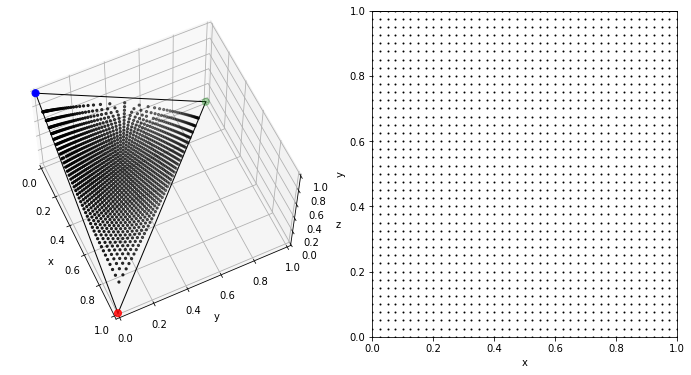

In [45]:
plot_inverse_bijection(cube_to_simplex)

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection


import numpy as np

def simplex_to_tetrahedron(x):
    """
    Maps a point from the standard 3-simplex to a point in the tetrahedron in 3D.

    Parameters:
    x (numpy.ndarray): A point in the standard 3-simplex, represented as a 4-dimensional vector.

    Returns:
    numpy.ndarray: A point in the tetrahedron in 3D, represented as a 3-dimensional vector.
    """
    A = np.array([[1, 1, 1, 1], [1, -1, -1, -1], [-1, 1, -1, -1], [-1, -1, 1, -1], [-1, -1, -1, 1]])
    b = np.array([0, 1, 0, 0, 0])
    y = np.linalg.solve(A, x - b)
    return np.array([y[1], y[2], y[3]])



def plot_tetrahedron_faces(ax):
    # Define the vertices of the tetrahedron
    vertices = np.array([[1, 1, 1], [1, -1, -1], [-1, 1, -1], [-1, -1, 1]])

    # Define the faces of the tetrahedron
    faces = np.array([[0, 1, 2], [0, 1, 3], [0, 2, 3], [1, 2, 3]])

    # Define the colors of the faces
    colors = ['r', 'g', 'b', 'y']

    # Create a Poly3DCollection object to represent the faces
    faces_collection = Poly3DCollection(vertices[faces], facecolors=colors, alpha=0.5)

    # Add the faces to the plot
    ax.add_collection(faces_collection)

    # Set the limits and labels of the plot
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)
    ax.set_zlim(-1.5, 1.5)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')


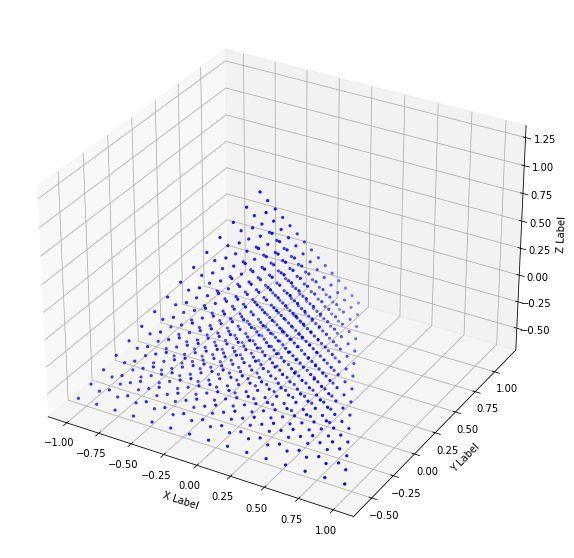

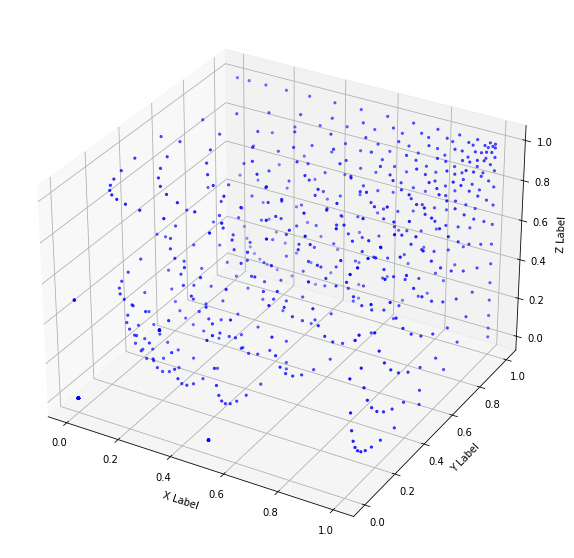

In [81]:
import numpy as np

mpl.rcParams['figure.figsize'] = [14, 10]
import numpy as np

def get_3simplex_points(n):
    """
    Returns n^3 evenly spaced points on the 3-simplex.
    """
    # Generate the x, y, and z coordinates of the points
    x = np.linspace(0, 1, n)
    y = np.linspace(0, 1, n)
    z = np.linspace(0, 1, n)
    X, Y, Z = np.meshgrid(x, y, z)

    # Remove points that are outside the 3-simplex
    mask = (X + Y + Z <= 1)
    X = X[mask]
    Y = Y[mask]
    Z = Z[mask]

    # Generate the w coordinates of the points
    W = 1 - X - Y - Z

    # Stack the coordinates into a single array
    points = np.column_stack((X, Y, Z, W))

    return points



import math 
def simplex_to_tetra(p):
    s3 = 1/math.sqrt(3.0)
    s6 = 1/math.sqrt(6.0)
    x =  -1*p[0] +  1*p[1] +    0*p[2] +    0*p[3]
    y = -s3*p[0] - s3*p[1] + 2*s3*p[2] +    0*p[3]
    z = -s3*p[0] - s3*p[1] -   s3*p[2] + 3*s6*p[3]
    return x, y, z


import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_points_3d(points):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    xs = [p[0] for p in points]
    ys = [p[1] for p in points]
    zs = [p[2] for p in points]
    ax.scatter(xs, ys, zs, c='b', marker='.')
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    plt.show()


sp = get_3simplex_points(n=15)
tetras = [simplex_to_tetra(p) for p in sp]
plot_points_3d(tetras)
cb = [ simplex_to_cube(p) for p in sp ] 
plot_points_3d(cb)

In [78]:
import numpy as np

def even_on_cube(n=10):
    # n = number of points along each dimension
    x = np.linspace(0.5/n, 1-0.5/n, n)
    X, Y, Z = np.meshgrid(x, x, x)
    points = np.column_stack((X.ravel(), Y.ravel(), Z.ravel()))
    return points 


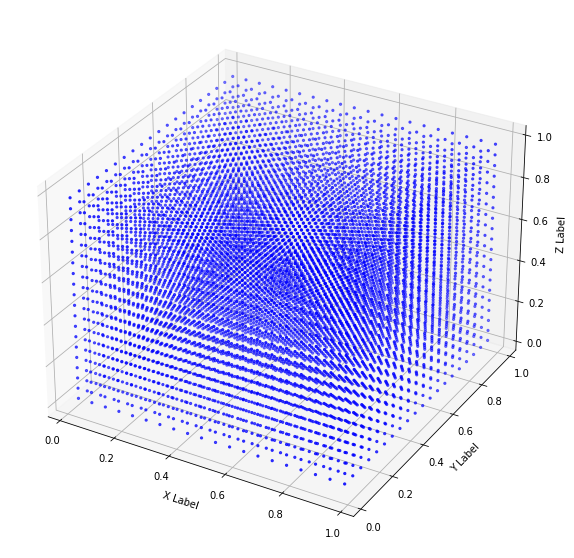

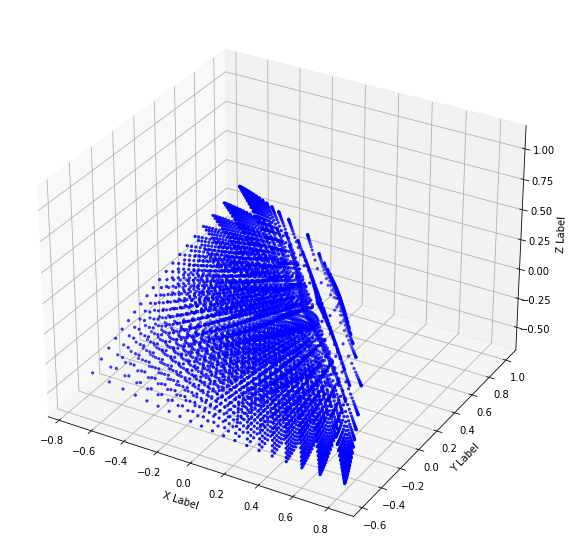

In [80]:
# See if they look even on the tetrahedron
ecb = even_on_cube(n=20)
plot_points_3d(ecb)
image = [ cube_to_simplex(p) for p in ecb ]
tetra_image = [simplex_to_tetra(p) for p in image]
plot_points_3d(tetra_image)

# Optimization
This part can be run independently of the rest of the notebook above.

### Lifting functions to different domains

In [ ]:
!pip install humpday[full]

In [4]:
import functools
import numpy as np
from winning.std_calibration import std_ability_implied_state_prices, std_state_price_implied_ability
from scipy.stats import norm
from typing import List
from winning.lattice_conventions import STD_UNIT, STD_SCALE, STD_L, STD_A, NAN_DIVIDEND

def cube_to_simplex(u:List[float]) -> List[float]: 
    """
       :param  u is a point on the interior of the hyper-cube (0,1)^n 
       :returns  a point p in (0,1)^{n+1} with sum(p)=1 
     
    """
    a = [0] + [ -norm.ppf(ui) for ui in u ]
    p = std_ability_implied_state_prices(a, L=5*STD_L, unit=0.5*STD_UNIT)
    return p 

def lift_to_cube(func):
    # func defined on simplex
    @functools.wraps(func)
    def wrapper(point):
        try:
          w = cube_to_simplex(point)
          return func(w)
        except:
          return 1000000

        try:
          return func(w)
        except:
          print(w)
          raise ValueError()
    return wrapper

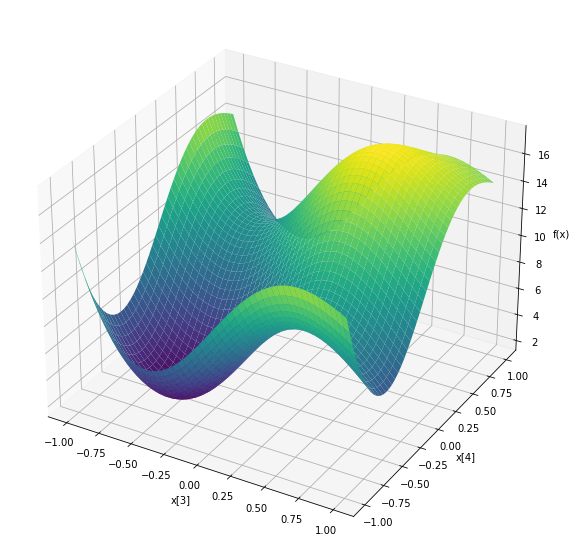

In [6]:
import numpy as np

DIM = 5
def difficult(x, dim=DIM):
    x = np.array(x)
    s = np.sin(np.pi * x)
    q = np.sum((np.outer(x, x) - np.eye(dim))**2)
    return np.sum(s * q)

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (12, 10)

def plot_function_on_grid(obj_func, x_fixed, x_min=-1, x_max=1, num_points=50):
    """
    Plots a 3D surface of the objective function by fixing five of the coordinates of x and varying the other two over a grid.
    """
    x, y = np.meshgrid(np.linspace(x_min, x_max, num_points), np.linspace(x_min, x_max, num_points))
    z = np.zeros_like(x)
    for i in range(num_points):
        for j in range(num_points):
            x_full = np.array([x_fixed[0], x_fixed[1], x_fixed[2], x[i,j], y[i,j]]) # YUCK HARDWIRED
            z[i,j] = obj_func(x_full)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(x, y, z, cmap='viridis')
    ax.set_xlabel('x[3]')
    ax.set_ylabel('x[4]')
    ax.set_zlabel('f(x)')
    plt.show()

# Example usage: plot the function for x[0]=0.2, x[1]=0.3, x[2]=0.5
plot_function_on_grid(difficult, np.array([0.2, 0.3, 0.5]))


To optimize on the simplex we would normally use a 5d function with one constraint. But instead ...

In [7]:
from humpday import points_race
lifted_objective = lift_to_cube(difficult) # Now a 4d function, not 5d 
lifted_objective([0.25,0.25,0.5,0.5])

13.031815503044236

Now we can try out a classic optimizer

In [8]:
from humpday.optimizers.scipycube import scipy_powell_cube
lifted_objective = lift_to_cube(difficult) # Now a 4d function, not 5d 
f_best, x_best = scipy_powell_cube(lifted_objective, n_trials=100, n_dim=4)
f_best

11.548553122787911

It fails to find a good point. Lets try some others. 

In [10]:
from humpday.optimizers.alloptimizers import SCIPY_OPTIMIZERS, SHGO_OPTIMIZERS, HYPEROPT_OPTIMIZERS
from humpday.optimizers.alloptimizers import OPTUNA_OPTIMIZERS, NEVERGRAD_OPTIMIZERS, FREELUNCH_OPTIMIZERS
from humpday.optimizers.alloptimizers import FREELUNCH_OPTIMIZERS, SKOPT_GP_OPTIMIZERS, OPTIMIZERS

from humpday.optimizers.alloptimizers import OPTIMIZERS
# A couple seem to be broken so:
CANDIDATES = [ opt for opt in OPTIMIZERS if not 'ax' in opt.__name__ or 'free' in opt.__name__]

n_trials = 100
results = list()
from pprint import pprint
for opt in CANDIDATES:
    try:
      f_best, x_best = opt(lifted_objective, n_trials=n_trials, n_dim=DIM-1)
      results.append( (f_best, opt.__name__))
      pprint(sorted(results))
    except:
      print(opt.__name__+' failed')


[(0.02835527836079321, 'shgo_slsqp_sobol_cube')]
[(0.02835527836079321, 'shgo_powell_sobol_cube'),
 (0.02835527836079321, 'shgo_slsqp_sobol_cube')]
[(0.02835527836079321, 'shgo_nelder_sobol_cube'),
 (0.02835527836079321, 'shgo_powell_sobol_cube'),
 (0.02835527836079321, 'shgo_slsqp_sobol_cube')]
[(0.02835527836079321, 'shgo_nelder_sobol_cube'),
 (0.02835527836079321, 'shgo_powell_sobol_cube'),
 (0.02835527836079321, 'shgo_slsqp_sobol_cube'),
 (1000000, 'scipy_slsqp_cube')]
[(0.02835527836079321, 'shgo_nelder_sobol_cube'),
 (0.02835527836079321, 'shgo_powell_sobol_cube'),
 (0.02835527836079321, 'shgo_slsqp_sobol_cube'),
 (11.548553122787911, 'scipy_powell_cube'),
 (1000000, 'scipy_slsqp_cube')]
[(0.02835527836079321, 'shgo_nelder_sobol_cube'),
 (0.02835527836079321, 'shgo_powell_sobol_cube'),
 (0.02835527836079321, 'shgo_slsqp_sobol_cube'),
 (11.548553122787911, 'scipy_powell_cube'),
 (1000000, 'scipy_lbfgsb_cube'),
 (1000000, 'scipy_slsqp_cube')]
[(0.02835527836079321, 'shgo_nelder_sob